Importing the Dependencies

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# loading the dataset to a pandas dataframe
credit = pd.read_csv('creditcard.csv')

In [ ]:
# first five rows of the datasets
credit.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13949,24754,1.252924,-0.182189,-0.802716,-0.210981,1.916713,3.643624,-0.778711,0.818295,1.706962,...,-0.497088,-1.211285,0.043809,0.964159,0.442030,0.261483,-0.051402,0.005112,23.74,0.0
13950,24756,-0.346979,-2.103284,-0.685061,1.961605,-0.401125,0.473632,1.133816,-0.256528,0.893409,...,0.359662,-0.316275,-0.864259,-0.279881,0.491802,-0.353996,-0.149931,0.129795,794.20,0.0
13951,24759,-6.053652,-5.988723,0.810413,-0.011811,1.308135,-0.590803,-0.725838,-0.234840,1.624646,...,-0.771970,1.474668,3.176363,-0.302410,0.052529,-0.373871,-0.700463,2.508443,60.00,0.0
13952,24759,1.169121,-1.284945,0.032717,-0.681670,0.660598,4.412578,-1.913115,1.076592,1.501230,...,-0.557596,-0.882435,-0.041523,0.975445,0.297229,0.550515,0.015029,0.032067,90.00,0.0
13953,24759,-6.917152,5.854171,-1.652458,-1.488884,-0.833891,-0.344418,0.393789,0.379968,6.133597,...,-1.404681,-1.124694,0.174333,-0.528234,0.990685,-0.035875,1.071374,-0.168831,NaN,NaN


In [ ]:
# Information about dataset
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [ ]:
# checking the number of missing values in each column
credit.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
# distribution of ligit transaction and fraudulant transaction
credit['Class'].value_counts()

,count
Class,
0.0,13897
1.0,56


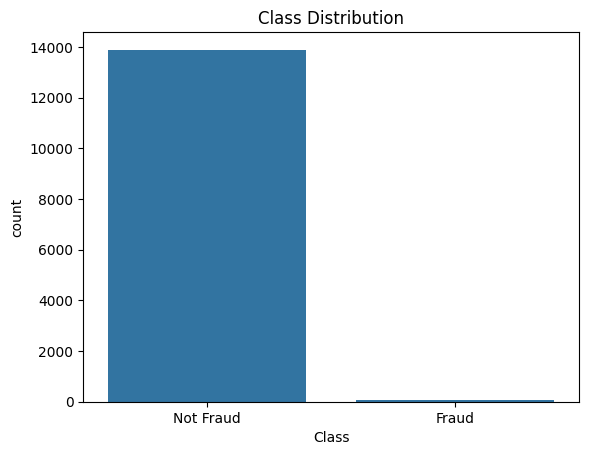

In [ ]:
sns.countplot(x='Class', data=credit)
plt.title('Class Distribution')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

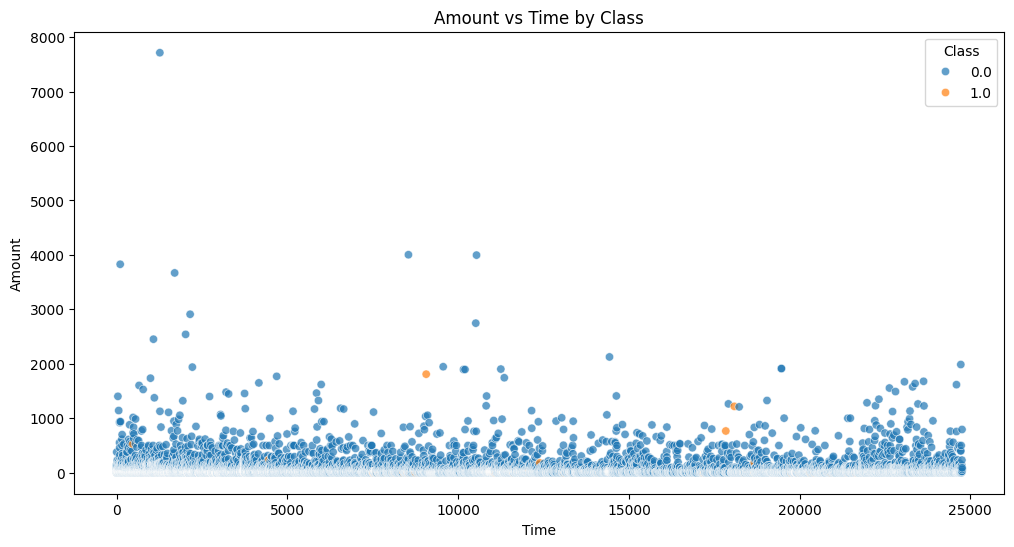

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=credit, alpha=0.7)
plt.title('Amount vs Time by Class')
plt.show()


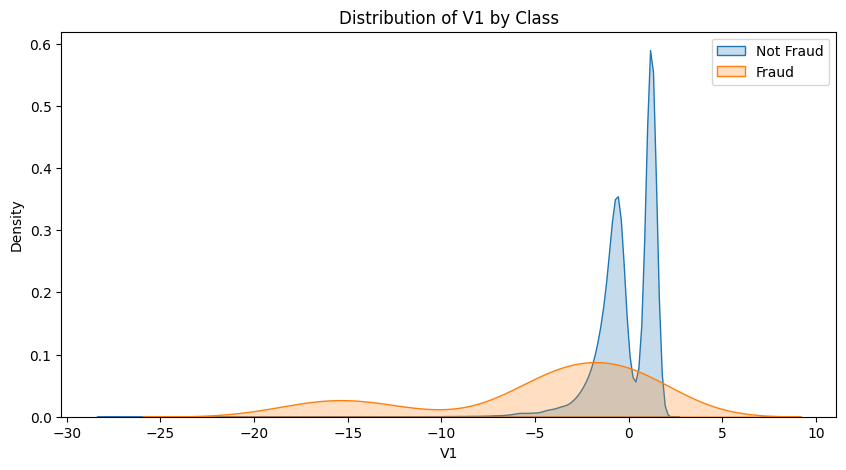

In [ ]:
# Example: V1 feature
plt.figure(figsize=(10,5))
sns.kdeplot(credit[credit['Class']==0]['V1'], label='Not Fraud', fill=True)
sns.kdeplot(credit[credit['Class']==1]['V1'], label='Fraud', fill=True)
plt.title('Distribution of V1 by Class')
plt.legend()
plt.show()


This dataset is highly unbalanced

0 ---> Normal Transaction

1 ---> Fraudulent Transaction

In [ ]:
# seperating the data for analysis
# all the legit transaction from column class will store in legit variable
# and the fraudulant transaction will store in the fraud variable
legit = credit[credit.Class == 0]
fraud = credit[credit.Class == 1]

In [44]:
print(legit.shape)
print(fraud.shape)

(13897, 31)
(56, 31)


In [43]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,13897.000000
mean,63.773909
std,177.164503
min,0.000000
25%,5.770000
50%,15.900000
75%,52.370000
max,7712.430000


In [42]:
# compare the values for both transacation
# this difference will help the machine learning algorithm to predict the transaction is legit or fraud
credit.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,10111.481255,-0.217093,0.266252,0.887227,0.276789,-0.107510,0.136745,-0.131462,-0.020385,1.005460,...,0.020758,-0.068686,-0.158230,-0.034834,0.013065,0.117928,0.034349,0.009565,0.002329,63.773909
1.0,12262.107143,-4.727948,4.660436,-9.328536,6.783464,-2.890388,-2.030360,-6.578337,1.028374,-2.981468,...,0.453283,0.116896,0.048132,-0.225526,-0.452514,-0.124184,0.333325,0.793484,-0.046177,90.815893


In [41]:
fraud.Amount.describe()


,Amount
count,56.000000
mean,90.815893
std,310.308450
min,0.000000
25%,1.000000
50%,1.000000
75%,1.025000
max,1809.680000


Under-Sampling

 Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulant Transaction --> 492

In [40]:
legit_sample = legit.sample(n=492)

Concatenating two dataframes

In [ ]:
#here axis=0 means dataframe will be added one by one and if axis=1 then it will add column wise
new_dataset = pd.concat([legit_sample, fraud], axis=0)


In [39]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3270,2820,-1.031687,0.464985,1.199978,-2.090495,-0.256690,-0.460438,0.119366,0.230882,1.666532,...,0.153282,0.647394,-0.343316,-0.433819,0.307043,-0.734760,-0.380361,-0.170009,0.90,0.0
2629,2156,-3.653078,1.957321,0.248727,-0.945482,0.555413,4.908490,-1.142774,1.301945,2.478100,...,-1.082133,-0.847052,-0.233986,0.953155,1.071751,-0.087781,1.128044,0.424028,20.00,0.0
10420,16853,-0.271129,0.393045,2.365937,1.609226,-0.740824,0.534615,0.188876,-0.094567,1.816009,...,-0.117836,0.282265,0.086593,0.348235,-0.453363,-0.400635,-0.169541,-0.194173,98.94,0.0
2292,1836,-0.628620,-0.098869,2.445955,-1.845587,-0.977920,0.131040,-0.324024,0.194397,-0.803011,...,-0.154277,-0.098721,-0.249667,-0.429388,0.078979,1.086783,0.000107,0.061330,42.94,0.0
5701,5987,-0.148120,2.521435,-2.350749,1.926179,0.475644,-1.650702,0.126441,0.565260,0.620028,...,-0.183431,-0.142650,0.271092,0.013054,-0.468302,-0.423918,0.108598,-0.053975,0.99,0.0


In [38]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11880,20451,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,...,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,1.0,1.0
12070,20931,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,...,-2.343674,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,1.0,1.0
12108,21046,-16.917468,9.669900,-23.736443,11.824990,-9.830548,-2.514829,-17.290657,1.820408,-6.264903,...,-2.336111,0.972755,1.241866,-1.051086,0.038009,0.672317,2.108471,-1.421243,1.0,1.0
12261,21419,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,...,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.0,1.0
12369,21662,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,...,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1.0,1.0


In [37]:
new_dataset['Class'].value_counts()

,count
Class,
0.0,492
1.0,56


In [36]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,10373.378049,-0.244935,0.250743,0.887391,0.275833,0.006895,0.213856,-0.144188,-0.045972,1.022406,...,0.016714,-0.088127,-0.211266,-0.054630,0.023691,0.097169,0.023491,0.001658,-0.000040,65.520244
1.0,12262.107143,-4.727948,4.660436,-9.328536,6.783464,-2.890388,-2.030360,-6.578337,1.028374,-2.981468,...,0.453283,0.116896,0.048132,-0.225526,-0.452514,-0.124184,0.333325,0.793484,-0.046177,90.815893


Splitting the data into Features and Targets

In [35]:

X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [ ]:
print(X)

            Time        V1        V2  ...       V27       V28  Amount
61850    50015.0  1.107599 -0.911289  ...  0.023963  0.011327    1.00
85776    60935.0 -0.300251  0.756388  ...  0.166961  0.125801   18.87
14075    25052.0 -0.607434  0.542103  ... -0.089261 -0.065446  106.45
21389    31637.0 -5.146394  2.914724  ...  0.276312 -0.016894   89.99
137758   82309.0  1.280310 -0.942854  ...  0.014067  0.015406   29.99
...          ...       ...       ...  ...       ...       ...     ...
279863  169142.0 -1.927883  1.125653  ...  0.292680  0.147968  390.00
280143  169347.0  1.378559  1.289381  ...  0.389152  0.186637    0.76
280149  169351.0 -0.676143  1.126366  ...  0.385107  0.194361   77.89
281144  169966.0 -3.113832  0.585864  ...  0.884876 -0.253700  245.00
281674  170348.0  1.991976  0.158476  ...  0.002988 -0.015309   42.53

[984 rows x 30 columns]


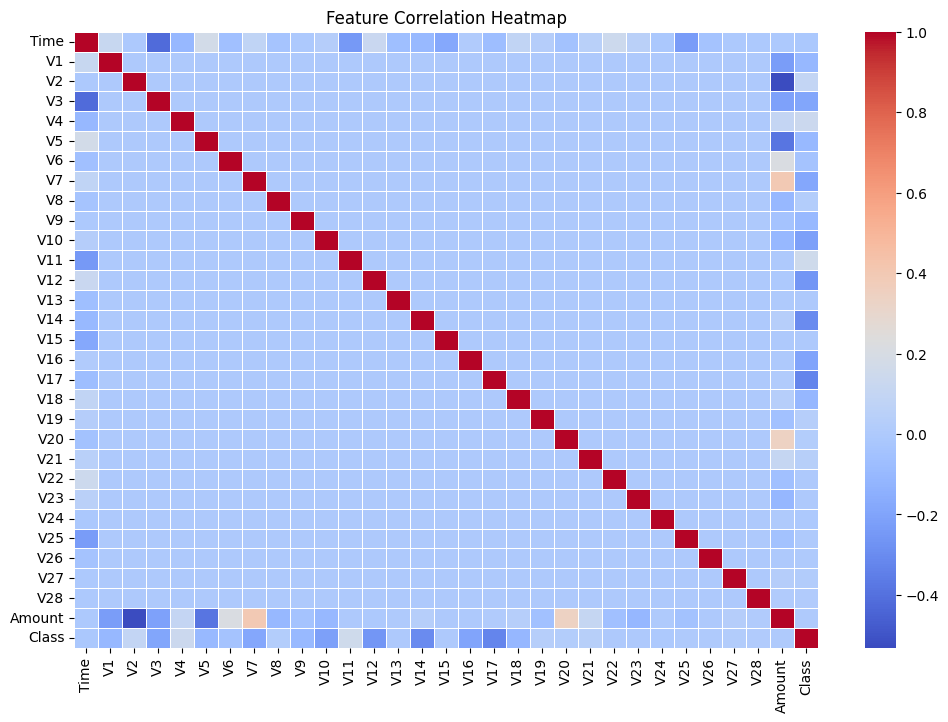

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(credit.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [ ]:
print(Y)

61850     0
85776     0
14075     0
21389     0
137758    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


Split the data into training data and testing data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(548, 30) (438, 30) (110, 30)


Model Trianing

Logistic Regression

In [46]:
model = LogisticRegression()

In [48]:
# Training the logistics regression model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [50]:
# Prediction
y_pred = model.predict(X_test)
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [51]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9817351598173516


In [52]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [53]:
# if the accuracy score training data is different from test data then our model will be considered as underfitting so it will not predict accurate
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9636363636363636


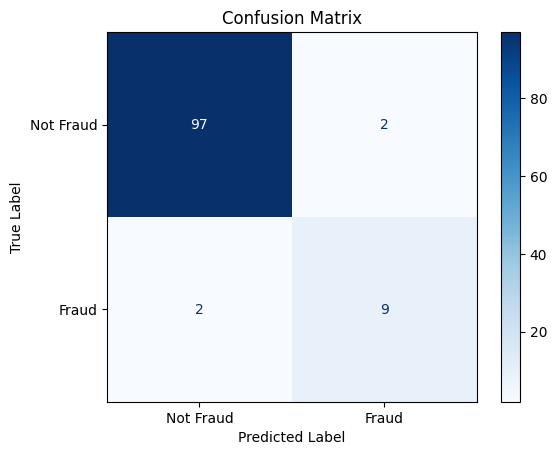

Classification Report:

              precision    recall  f1-score   support

   Not Fraud       0.98      0.98      0.98        99
       Fraud       0.82      0.82      0.82        11

    accuracy                           0.96       110
   macro avg       0.90      0.90      0.90       110
weighted avg       0.96      0.96      0.96       110



In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc

# Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Fraud', 'Fraud'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [57]:
# Classification Report
print("Classification Report:\n")
print(classification_report(Y_test, y_pred, target_names=['Not Fraud', 'Fraud']))

Classification Report:

              precision    recall  f1-score   support

   Not Fraud       0.98      0.98      0.98        99
       Fraud       0.82      0.82      0.82        11

    accuracy                           0.96       110
   macro avg       0.90      0.90      0.90       110
weighted avg       0.96      0.96      0.96       110



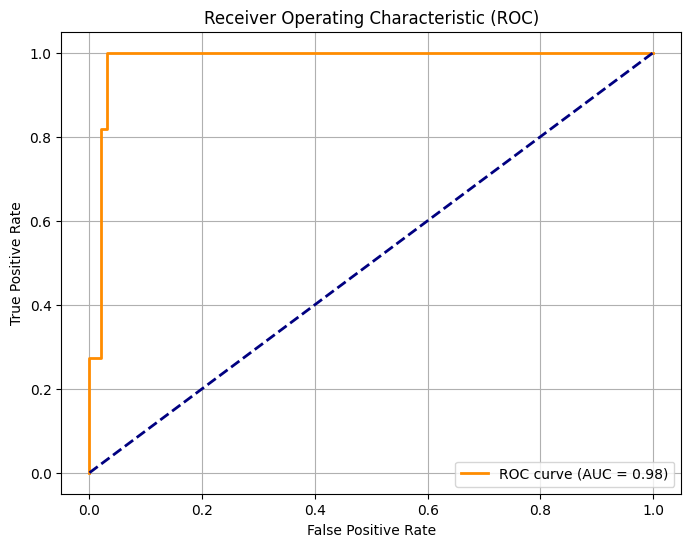

In [56]:
# ROC Curve & AUC
y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()